In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [2]:
def load_results(results_path):
    """Load saved model results."""
    with open(results_path, 'rb') as f:
        results = pickle.load(f)
    return results

In [6]:
def compare_models(results_list):
    """
    Compare multiple models based on their results.
    
    Args:
        results_list: List of dictionaries containing model results
    """
    # Create comparison dataframe
    comparison_data = []
    for results in results_list:
        comparison_data.append({
            'Model': results['model_name'],
            'Test Accuracy': results['test_accuracy'],
            'Test Loss': results['test_loss']
        })
    
    df = pd.DataFrame(comparison_data)
    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    print(df.to_string(index=False))
    print("="*60 + "\n")
    
    return df

In [7]:
def plot_accuracy_comparison(results_list):
    """Plot accuracy comparison bar chart."""
    model_names = [r['model_name'] for r in results_list]
    accuracies = [r['test_accuracy'] for r in results_list]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_names, accuracies, color=['#3498db', '#e74c3c', '#2ecc71'][:len(model_names)])
    plt.ylabel('Test Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim([0, 1])
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [8]:
def plot_training_comparison(results_list):
    """Plot training history comparison."""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    
    for i, results in enumerate(results_list):
        history = results['history']
        model_name = results['model_name']
        color = colors[i % len(colors)]
        
        # Accuracy plot
        axes[0].plot(history['val_accuracy'], label=model_name, color=color, linewidth=2)
        
        # Loss plot
        axes[1].plot(history['val_loss'], label=model_name, color=color, linewidth=2)
    
    axes[0].set_title('Validation Accuracy Comparison')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].set_title('Validation Loss Comparison')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [9]:
def generate_comparison_report(results_list):
    """Generate a comprehensive comparison report."""
    print("\n" + "="*80)
    print("COMPREHENSIVE MODEL COMPARISON REPORT")
    print("="*80 + "\n")
    
    for results in results_list:
        print(f"Model: {results['model_name']}")
        print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
        print(f"  Test Loss: {results['test_loss']:.4f}")
        
        history = results['history']
        final_train_acc = history['accuracy'][-1]
        final_val_acc = history['val_accuracy'][-1]
        
        print(f"  Final Training Accuracy: {final_train_acc:.4f}")
        print(f"  Final Validation Accuracy: {final_val_acc:.4f}")
        print(f"  Overfitting Gap: {abs(final_train_acc - final_val_acc):.4f}")
        print(f"  Training Epochs: {len(history['accuracy'])}")
        print()
    
    print("="*80 + "\n")

Loaded: ../data/custom_cnn_results.pkl
Loaded: ../data/mobilenetv2_results.pkl

MODEL COMPARISON
                          Model  Test Accuracy  Test Loss
                     Custom CNN         0.8667   0.411536
Transfer Learning - MobileNetV2         0.3562   1.797499


COMPREHENSIVE MODEL COMPARISON REPORT

Model: Custom CNN
  Test Accuracy: 0.8667
  Test Loss: 0.4115
  Final Training Accuracy: 0.8656
  Final Validation Accuracy: 0.8668
  Overfitting Gap: 0.0012
  Training Epochs: 50

Model: Transfer Learning - MobileNetV2
  Test Accuracy: 0.3562
  Test Loss: 1.7975
  Final Training Accuracy: 0.3203
  Final Validation Accuracy: 0.3463
  Overfitting Gap: 0.0261
  Training Epochs: 30




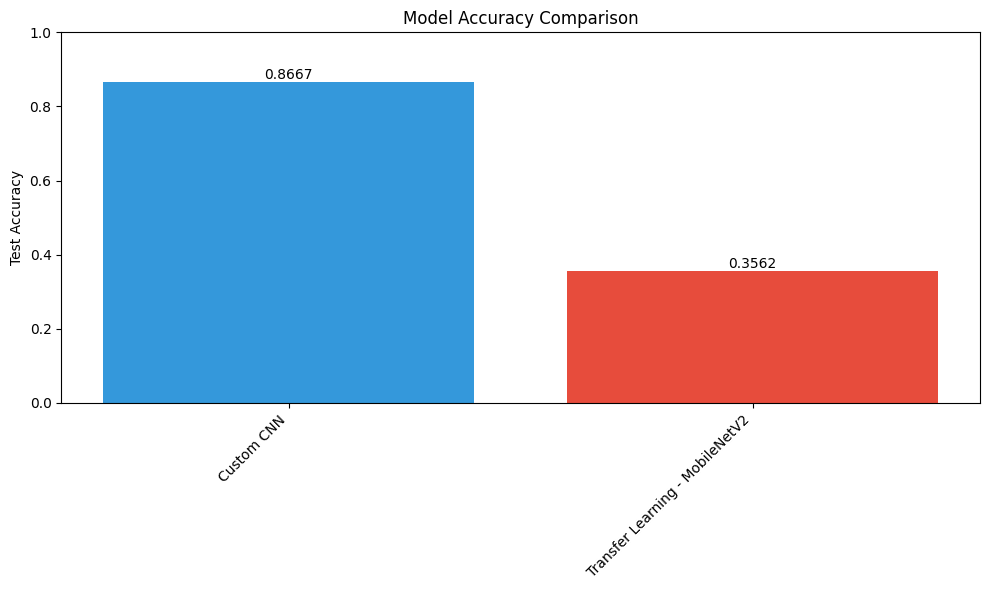

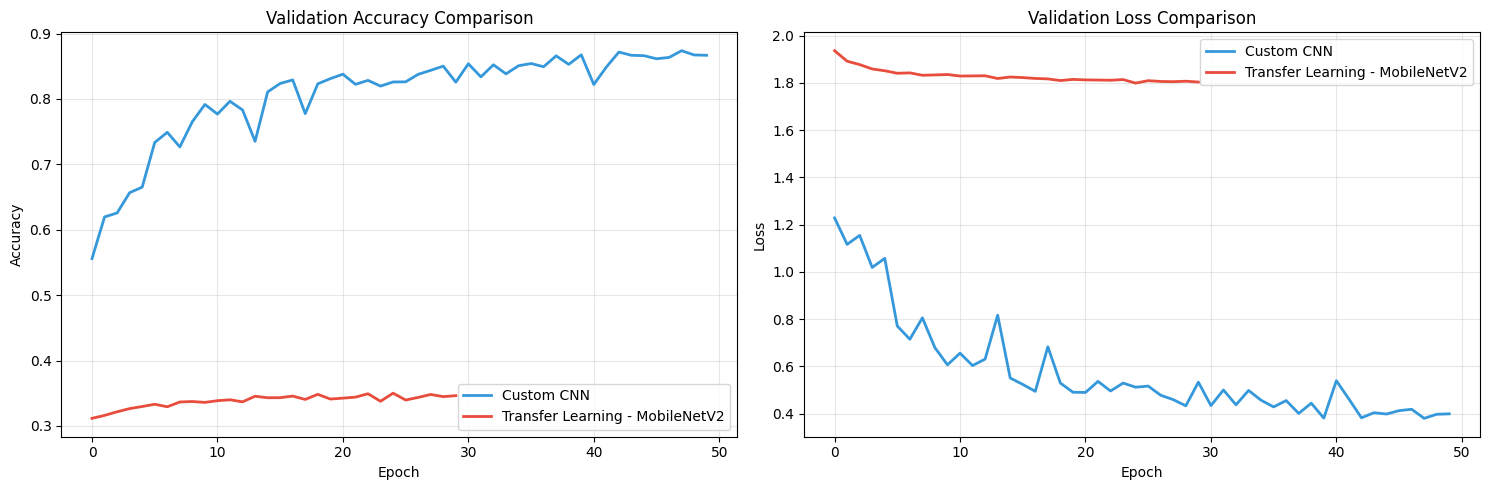

In [10]:
if __name__ == '__main__':
    # Load results from saved files
    results_files = [
        '../data/custom_cnn_results.pkl',
        '../data/mobilenetv2_results.pkl',
        # Add more as needed
    ]
    
    results_list = []
    for file_path in results_files:
        try:
            results = load_results(file_path)
            results_list.append(results)
            print(f"Loaded: {file_path}")
        except FileNotFoundError:
            print(f"File not found: {file_path}")
    
    if len(results_list) > 0:
        # Generate comparison
        df = compare_models(results_list)
        
        # Generate detailed report
        generate_comparison_report(results_list)
        
        # Plot comparisons
        plot_accuracy_comparison(results_list)
        plot_training_comparison(results_list)
    else:
        print("No results files found. Please train models first.")